### Library Imports

In [2]:
from sklearn.impute import SimpleImputer
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("imp.csv")
df

,variable1,variable2,variable3
0,19.0,49.77,1.0
1,13.0,53.16,1.0
2,NaN,50.19,2.0
3,17.0,48.79,NaN
4,5.0,NaN,2.0
5,16.0,51.05,3.0
6,NaN,53.57,2.0
7,20.0,51.22,2.0
8,18.0,47.98,2.0
9,12.0,NaN,2.0


Finding total number of missing values in the dataframe

In [4]:
df.isnull().sum()

variable1    2
variable2    3
variable3    2
dtype: int64

### Missing Value Deletion

- Deleting missing values be careful, if you have more missing values, then deletion will not solve your problem, it will make your analysis bad. 
- We normally go for deletion when we have 2% - 5% of data missing.
- For missing data above 5% we normally go with replacement. 

In [5]:
new_df = df.dropna()
new_df

,variable1,variable2,variable3
0,19.0,49.77,1.0
1,13.0,53.16,1.0
5,16.0,51.05,3.0
7,20.0,51.22,2.0
8,18.0,47.98,2.0
10,25.0,44.58,1.0
11,12.0,50.29,1.0


### Missing Value Replacement or Imputation


In [6]:
# first check the column by printing it
df['variable1']

0     19.0
1     13.0
2      NaN
3     17.0
4      5.0
5     16.0
6      NaN
7     20.0
8     18.0
9     12.0
10    25.0
11    12.0
12    30.0
13    22.0
Name: variable1, dtype: float64

In [7]:
# total number of missing values in variable 1 column
df['variable1'].isnull().sum()

2

In [8]:
# replacing the missing values in variable 1 by mean of variable 1 column
df['variable1'].mean()

17.416666666666668

In [13]:
df['variable1'] = df['variable1'].fillna(df['variable1'].mean())
df['variable1']

0     19.000000
1     13.000000
2     17.416667
3     17.000000
4      5.000000
5     16.000000
6     17.416667
7     20.000000
8     18.000000
9     12.000000
10    25.000000
11    12.000000
12    30.000000
13    22.000000
Name: variable1, dtype: float64

In [14]:
# replace the missing values by median of variable 2 in variable 2 column
df['variable2'] = df['variable2'].fillna(df['variable2'].median())
df['variable2']

0     49.77
1     53.16
2     50.19
3     48.79
4     50.29
5     51.05
6     53.57
7     51.22
8     47.98
9     50.29
10    44.58
11    50.29
12    52.77
13    50.29
Name: variable2, dtype: float64

In [15]:
# replace the missing value by any value of our choice in variable 3
df['variable3'] = df['variable3'].fillna("SACHIN")
df['variable3']

0        1.0
1        1.0
2        2.0
3     SACHIN
4        2.0
5        3.0
6        2.0
7        2.0
8        2.0
9        2.0
10       1.0
11       1.0
12    SACHIN
13       2.0
Name: variable3, dtype: object

### Using Python Imputer function 

- to replace all the missing values in one go. 
- you need sklearn library installed for this function to work. 

In [18]:
df = pd.read_csv("imp.csv")
df

,variable1,variable2,variable3
0,19.0,49.77,1.0
1,13.0,53.16,1.0
2,NaN,50.19,2.0
3,17.0,48.79,NaN
4,5.0,NaN,2.0
5,16.0,51.05,3.0
6,NaN,53.57,2.0
7,20.0,51.22,2.0
8,18.0,47.98,2.0
9,12.0,NaN,2.0


In [19]:
imputing = SimpleImputer(missing_values = np.nan, 
                         strategy = 'most_frequent')

In [20]:
new_data_array = imputing.fit_transform(df)
new_data_df = pd.DataFrame(new_data_array)
new_data_df

,0,1,2
0,19.0,49.77,1.0
1,13.0,53.16,1.0
2,12.0,50.19,2.0
3,17.0,48.79,2.0
4,5.0,44.58,2.0
5,16.0,51.05,3.0
6,12.0,53.57,2.0
7,20.0,51.22,2.0
8,18.0,47.98,2.0
9,12.0,44.58,2.0


In [21]:
# re-writing the column names that were lost in the imputation
new_data_df.columns = ['variable1', 'variable2', 'variable3']
new_data_df

,variable1,variable2,variable3
0,19.0,49.77,1.0
1,13.0,53.16,1.0
2,12.0,50.19,2.0
3,17.0,48.79,2.0
4,5.0,44.58,2.0
5,16.0,51.05,3.0
6,12.0,53.57,2.0
7,20.0,51.22,2.0
8,18.0,47.98,2.0
9,12.0,44.58,2.0


### Outlier Detection and Treatment

In [12]:
fram = pd.read_csv("framingham.csv")
fram.head(3)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0


<Axes: ylabel='BMI'>

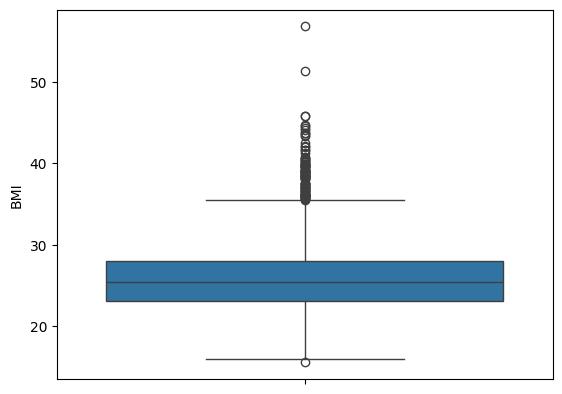

In [13]:
sns.boxplot(fram['BMI'])

<Axes: ylabel='BMI'>

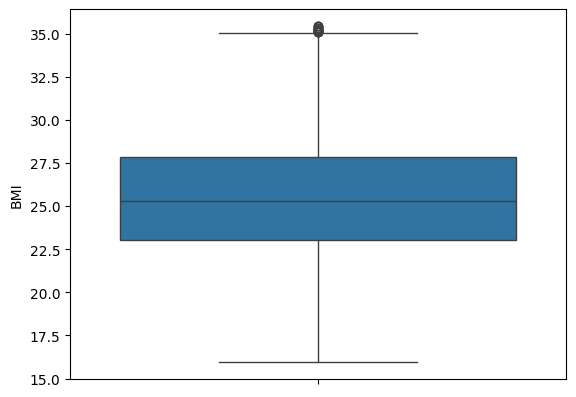

In [14]:
def rem_outliers(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3 - q1
    fence_low = q1 - 1.5*iqr
    fence_high = q3 + 1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) &
                       (df_in[col_name] < fence_high)]
    return df_out

fram = rem_outliers(fram, 'BMI')
sns.boxplot(fram['BMI'])

Winsorization is a statistical technique used to limit extreme values in data to reduce the impact of outliers. Instead of removing outliers, it replaces them with less extreme values. This helps in making the data more robust for analysis, especially in cases where extreme values could skew the results.

How Winsorization Works:
- Lower-bound outliers are replaced with the smallest value within a specific percentile.
- Upper-bound outliers are replaced with the largest value within a specific percentile.
- For example, if you're performing 5% Winsorization on a dataset:

- All values below the 5th percentile are set to the value at the 5th percentile.
- All values above the 95th percentile are set to the value at the 95th percentile.

<Axes: ylabel='BMI'>

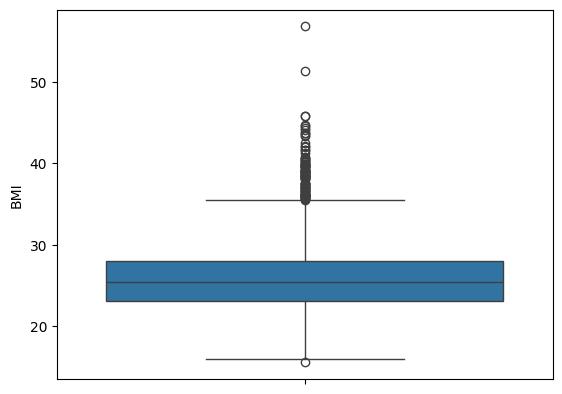

In [24]:
from scipy.stats.mstats import winsorize

fram = pd.read_csv("framingham.csv")
sns.boxplot(fram['BMI'])

<Axes: >

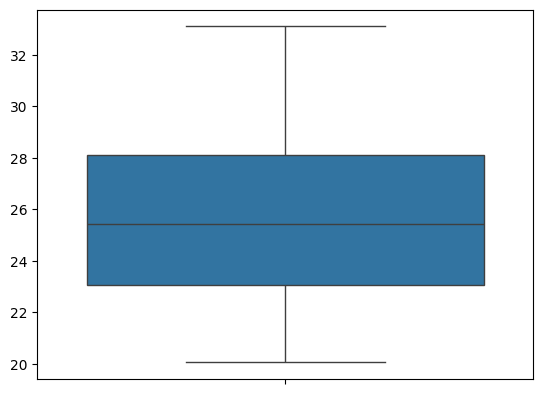

In [26]:
winsorized_BMI = winsorize(fram['BMI'], limits=[0.05, 0.05])
sns.boxplot(winsorized_BMI)